In [1]:
import numpy as np
from l5kit.data import LocalDataManager, ChunkedDataset
from l5kit.configs import load_config_data
from l5kit.rasterization import build_rasterizer
import matplotlib.pyplot as plt


In [2]:
path = 'expert_replay_approx_channel7_im112_sample'
ex = np.load(path+'.npy', allow_pickle=True)
os.environ["L5KIT_DATA_FOLDER"] = "."
dm = LocalDataManager(None)
# get config
cfg = load_config_data("./config.yaml")
rasterizer = build_rasterizer(cfg, dm)

In [3]:
ex[0, 0].shape

(7, 112, 112)

In [4]:
al = []
sl = []
for idx in range(ex.shape[0]):
    al.append(ex[idx, 2][0])
    sl.append(ex[idx, 2][1])
accel_bin = plt.hist(al, bins=9)[1]
accel_action_space = accel_bin[1:]*.5 + accel_bin[:-1]*.5
steer_bin = plt.hist(sl, bins=27)[1]
steer_action_space = steer_bin[1:]*.5 + steer_bin[:-1]*.5
# print (accel_action_space, steer_action_space)

In [5]:
for idx in range(ex.shape[0]):
    accel = ex[idx, 2][0]
    steer = ex[idx, 2][1]                                                                              
    print(accel, steer)
    break

0.03658023577183478 0.0019229533719156144


In [ ]:
def approx_to_action_space(self, ex_action:Tuple):
        pass

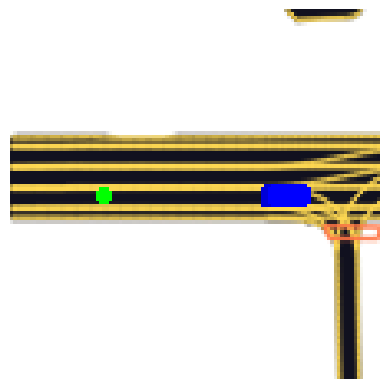

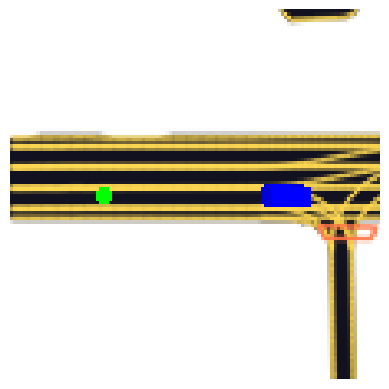

[0.         0.01568628 0.03921569 0.0627451  0.07843138 0.12941177
 0.16078432 0.64705884 0.6627451  0.8        0.8039216  0.8509804
 1.        ]


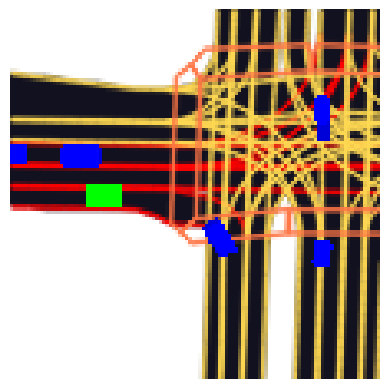

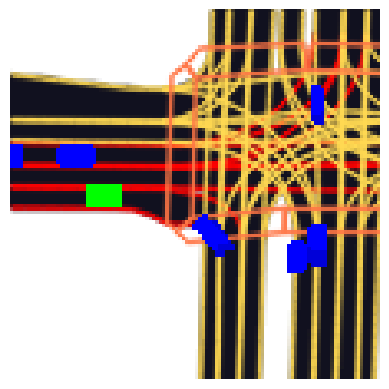

[0.         0.03137255 0.03921569 0.13725491 0.16470589 0.20784314
 0.22745098 0.43529412 0.4509804  0.5294118  0.5372549  0.5411765
 0.85882354 0.9098039  1.        ]


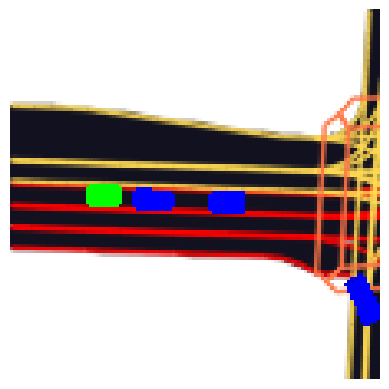

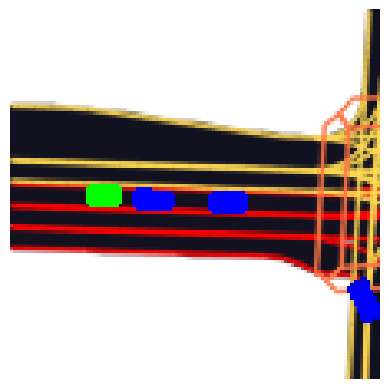

[0.         0.00784314 0.02352941 0.05490196 0.07058824 0.15686275
 0.1882353  0.20784314 0.22745098 0.59607846 0.6156863  0.70980394
 0.7176471  0.7254902  0.8666667  0.9098039  1.        ]


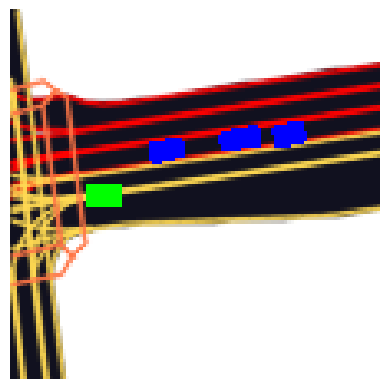

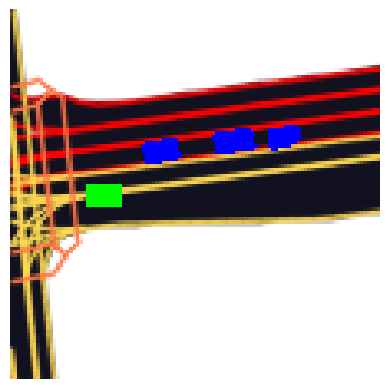

[0.         0.02352941 0.03137255 0.12941177 0.15686275 0.20784314
 0.22745098 0.37254903 0.39215687 0.4627451  0.47058824 0.4745098
 0.85882354 0.9098039  1.        ]


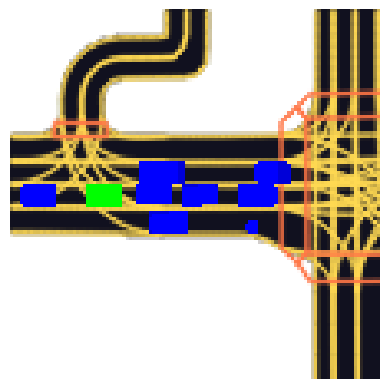

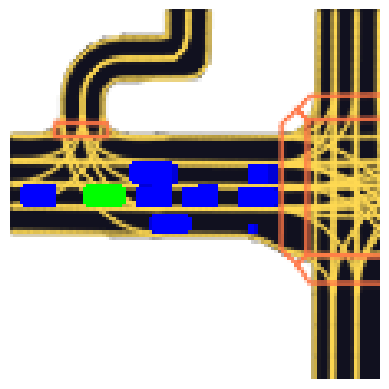

[0.         0.04705882 0.0627451  0.14901961 0.18039216 0.20784314
 0.22745098 0.5568628  0.57254905 0.6784314  0.6862745  0.6901961
 0.69411767 0.85882354 0.9098039  1.        ]


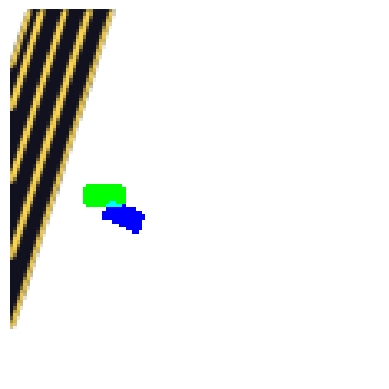

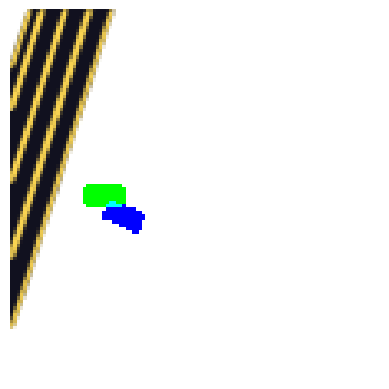

[0.         0.0627451  0.07058824 0.08235294 0.10588235 0.12941177
 0.18431373 0.20784314 0.21568628 0.22745098 0.77254903 0.7882353
 0.89411765 0.8980392  0.9019608  0.9098039  1.        ]


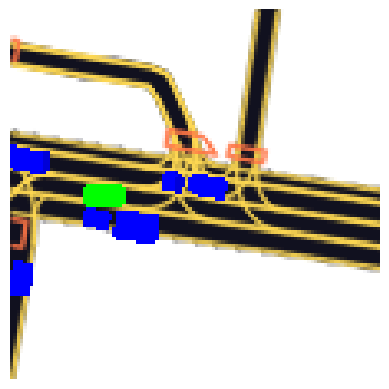

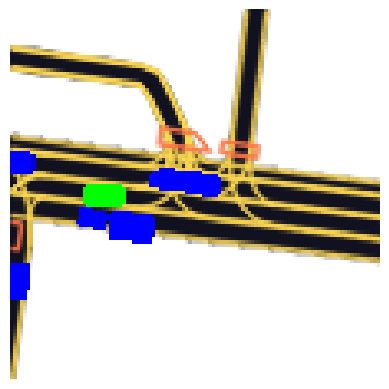

[0.         0.02352941 0.05490196 0.07058824 0.08627451 0.17254902
 0.19215687 0.20784314 0.22745098 0.6862745  0.6901961  0.7058824
 0.81960785 0.83137256 0.8352941  0.87058824 0.9098039  1.        ]


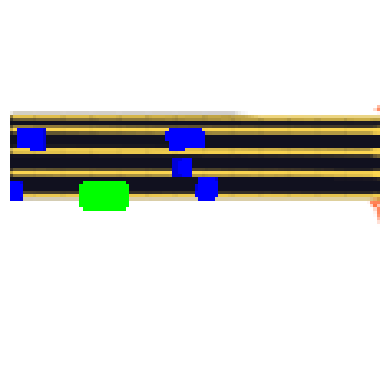

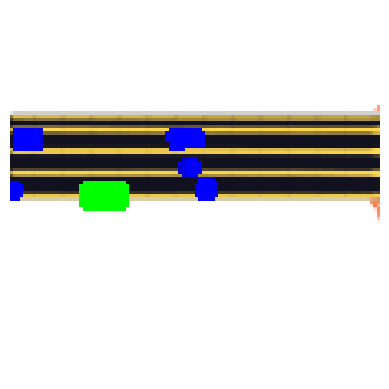

[0.         0.03921569 0.07843138 0.08235294 0.09803922 0.18431373
 0.20784314 0.22745098 0.7411765  0.75686276 0.8666667  0.87058824
 0.8745098  0.8784314  0.8901961  0.9098039  1.        ]


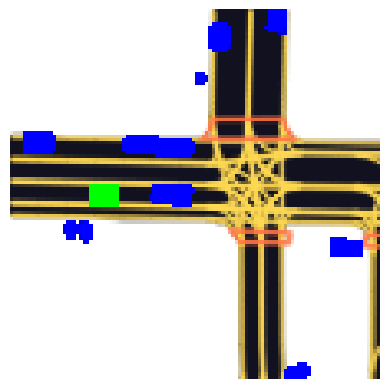

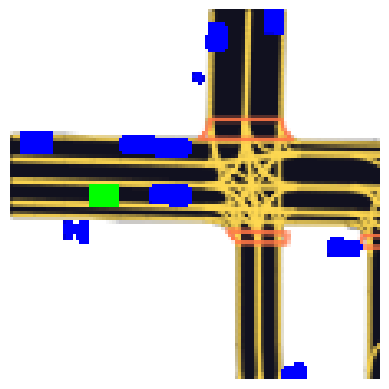

[0.         0.03921569 0.05490196 0.14509805 0.17254902 0.20784314
 0.22745098 0.49019608 0.5019608  0.5921569  0.6        0.6039216
 0.8627451  0.9098039  1.        ]


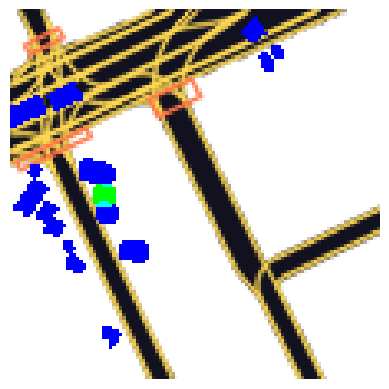

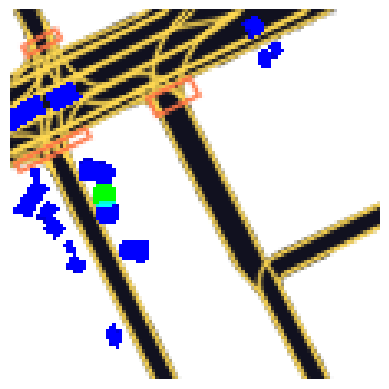

[0.         0.01568628 0.03921569 0.0627451  0.07843138 0.16470589
 0.19215687 0.20784314 0.22745098 0.64705884 0.6627451  0.78431374
 0.7882353  0.79607844 0.8666667  0.9098039  1.        ]


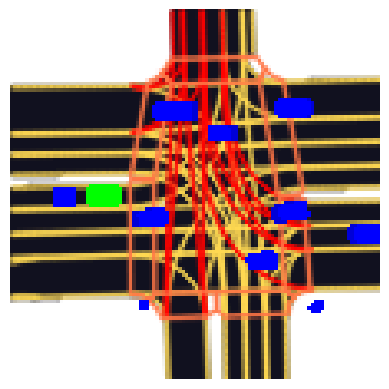

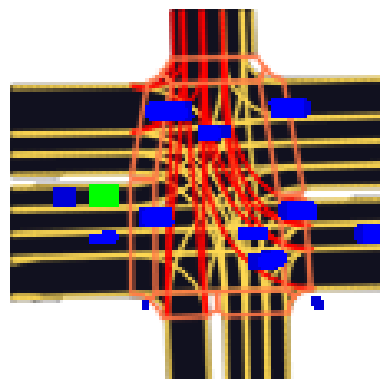

[0.         0.02352941 0.04705882 0.07058824 0.08627451 0.17254902
 0.19215687 0.20784314 0.22745098 0.6784314  0.69411767 0.8
 0.80784315 0.8117647  0.8156863  0.8784314  0.9098039  1.        ]


In [12]:
for idx in range(0, ex.shape[0], ex.shape[0] // 10):
    data = ex[idx]
    im1 = rasterizer.to_rgb(data[0].transpose(1, 2, 0))
    im2 = rasterizer.to_rgb(data[1].transpose(1, 2, 0))
    plt.imshow(im1)
    plt.axis('off')
    plt.show()
    
    plt.imshow(im2)
    plt.axis('off')
    plt.show()
    print(np.unique(data[0][2] - data[0][3]))